# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._:2021-07811\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5 2024, 11:41 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

Discussion:

For Module A3, we utilize spectra data. We first calculate its mean and standard deviation and we plot it together on a graph. From the graph, we can see peaks at ~3750 , 5000, ~6500 Angstroms. The peaks at mean spectrum indicate common features found in the samples, while peaks at the standard deviation suggest uncertainty in intensity at the certain wavelengths. In our case though, they are found in the same wavelengths. This implies common features whilst their intensities vary significantly across samples. We then utilize Principal Component Analysis on the spectra that we normalize as well. Through the PCA we are able to obtain the corresponding eigenvectors.

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [4]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [5]:
data.files

['spec_recons', 'wavelength']

In [6]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

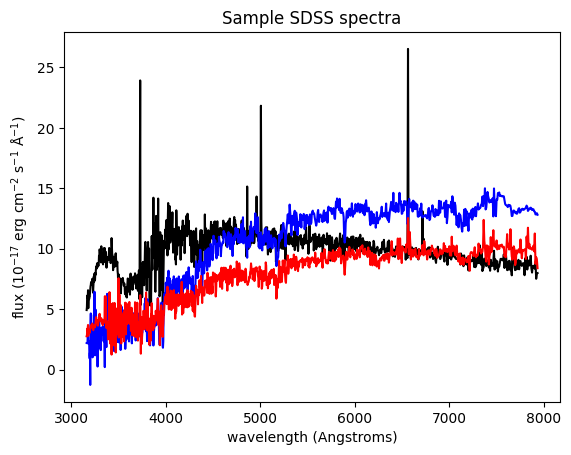

In [8]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


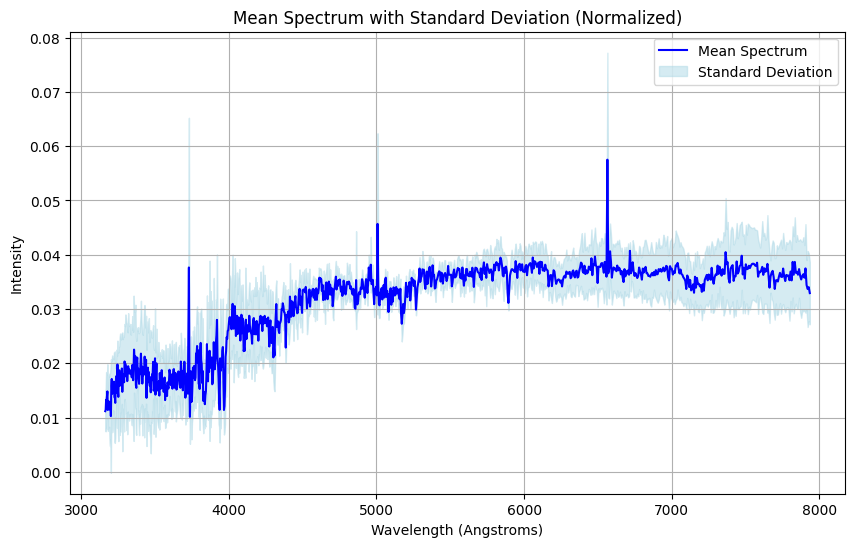

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

normalized_flux0 = normalize(flux0.reshape(1, -1))
normalized_flux1 = normalize(flux1.reshape(1, -1))
normalized_flux2 = normalize(flux2.reshape(1, -1))

#mean spectrum and standard deviation
mean_spectrum = np.mean([normalized_flux0, normalized_flux1, normalized_flux2], axis=0).flatten()
std_spectrum = np.std([normalized_flux0, normalized_flux1, normalized_flux2], axis=0).flatten()

#plotting mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(wavelength, mean_spectrum, label='Mean Spectrum', color='blue')
plt.fill_between(wavelength, mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, label ='Standard Deviation', color='lightblue', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Intensity')
plt.title('Mean Spectrum with Standard Deviation (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# Describe the mean spectrum and note wavelengths with the highest variation
# Mean spectrum represents the average intensity across all spectra at each wavelength
# Wavelengths with the highest standard deviation indicate higher variation across the sample.
# The reason for this variation could be differences in the underlying physical properties of the sources, noise in the data, or measurement uncertainties.

peaks at ~3750 , 5000, ~6500 Angstroms

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


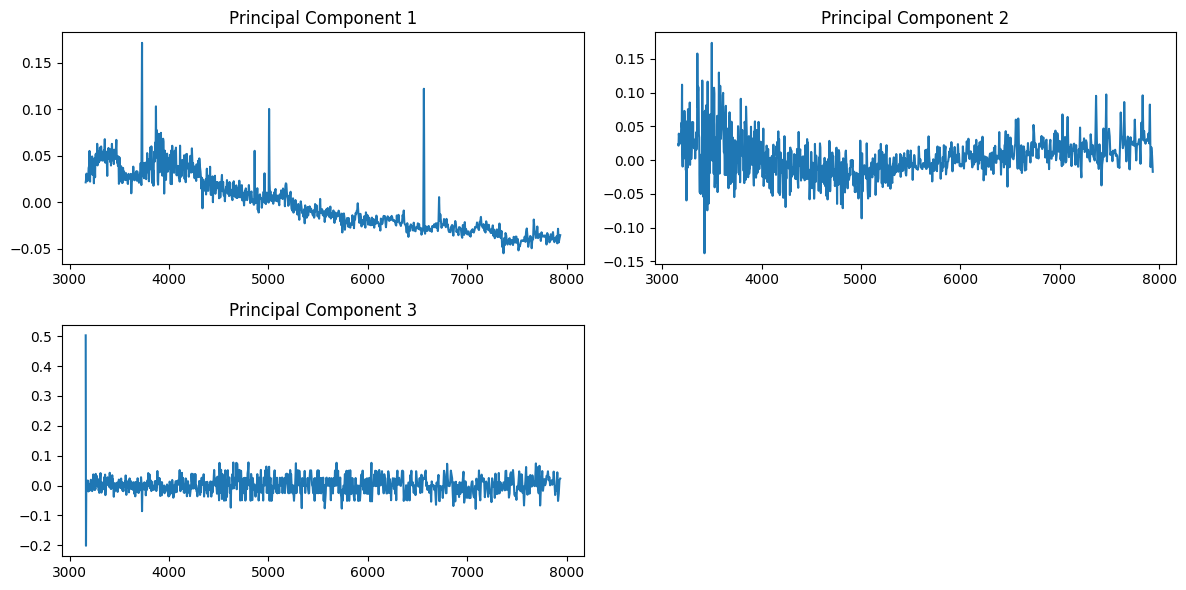

In [10]:
from sklearn.decomposition import PCA

# Combine the normalized spectra into a single array
normalized_spectra = np.vstack([normalized_flux0, normalized_flux1, normalized_flux2])

max_components = min(normalized_spectra.shape)
pca = PCA(n_components=max_components, svd_solver='full')
principal_components = pca.fit_transform(normalized_spectra)

#visualize
plt.figure(figsize=(12, 6))

for i in range(pca.n_components_):
    plt.subplot(2, 2, i+1)
    plt.plot(wavelength, pca.components_[i])
    plt.title(f"Principal Component {i+1}")

plt.tight_layout()
plt.show()

#ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full' explains addition of min()

##INTERPRET PCA
##cannot output pca4

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

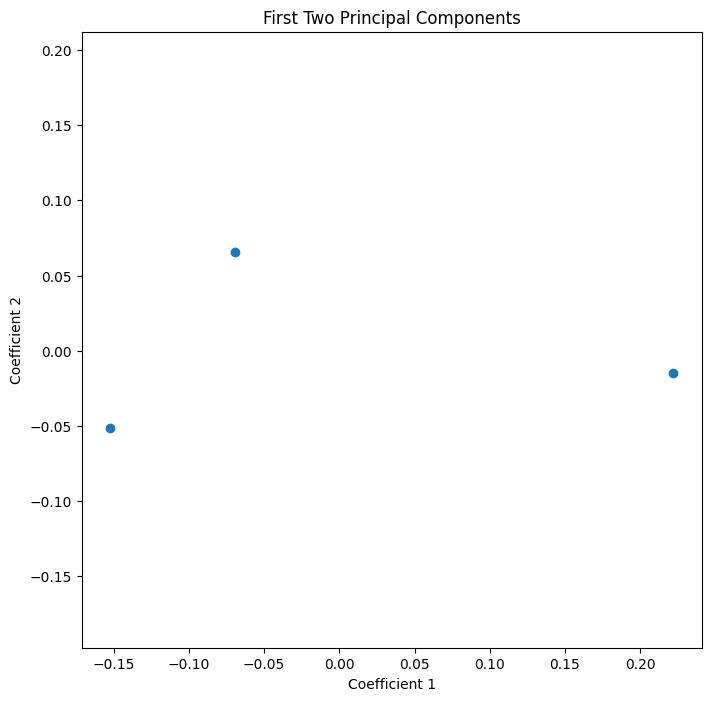

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_spectra)

#first two principal components
plt.figure(figsize=(8, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Coefficient 1")
plt.ylabel("Coefficient 2")
plt.title("First Two Principal Components")
plt.axis('equal')  # Set equal aspect ratio
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

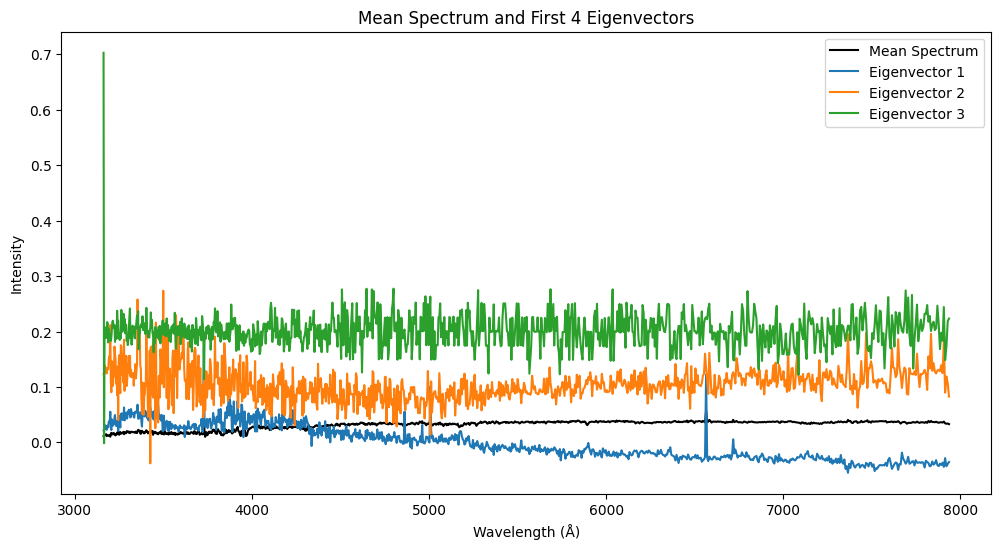

In [12]:
max_components = min(normalized_spectra.shape)

pca = PCA(n_components=max_components, svd_solver='full')
principal_components = pca.fit_transform(normalized_spectra)

mean_spectrum = np.mean(normalized_spectra, axis=0)

#mean spectrum and the first n eigenvectors
plt.figure(figsize=(12, 6))

#mean spectrum
plt.plot(wavelength, mean_spectrum, label='Mean Spectrum', color='black')

#eigenvectors with an arbitrary y-offset
num_components = min(4, pca.n_components_)
offset = 0.1  # Adjust this value for desired separation between spectra
for i in range(num_components):
    plt.plot(wavelength, pca.components_[i] + offset * i, label=f'Eigenvector {i+1}')

plt.xlabel("Wavelength (Å)")
plt.ylabel("Intensity")
plt.title("Mean Spectrum and First 4 Eigenvectors")
plt.legend()
plt.show()